In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Crimes_-_2018.csv")
data.dropna(inplace=True)
data = data.loc[(data['Primary Type'] == "THEFT")]
data["Date"] = data["Date"].str[:10]
days = np.unique(data["Date"].values)
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
66,11535234,JB553091,12/07/2018,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,...,42.0,32.0,06,1176364.0,1900524.0,2018,04/08/2019 04:11:13 PM,41.882394,-87.627845,"(41.882394062, -87.627844798)"
67,11534936,JB552789,12/10/2018,0000X N STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,42.0,32.0,06,1176364.0,1900524.0,2018,04/08/2019 04:11:13 PM,41.882394,-87.627845,"(41.882394062, -87.627844798)"
76,11526910,JB541954,12/06/2018,025XX W PETERSON AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),True,False,...,40.0,2.0,06,1158504.0,1941992.0,2018,04/07/2019 03:58:05 PM,41.996569,-87.692288,"(41.996569131, -87.692288143)"
170,11549187,JB570115,12/28/2018,004XX W MARQUETTE RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,6.0,68.0,06,1174441.0,1860502.0,2018,04/03/2019 04:04:24 PM,41.772613,-87.636099,"(41.772613371, -87.636098706)"
174,11498102,JB502817,11/04/2018,017XX W 66TH ST,0820,THEFT,$500 AND UNDER,RESIDENCE,True,False,...,15.0,67.0,06,1165934.0,1860929.0,2018,04/03/2019 04:04:24 PM,41.773970,-87.667271,"(41.773970137, -87.667270917)"


In [3]:
max_lat = data['Latitude'].max()
min_lat = data['Latitude'].min()
max_lon = data['Longitude'].max()
min_lon = data['Longitude'].min()
print(min_lat,max_lat,min_lon,max_lon)

41.644589713 42.022536147 -87.934272688 -87.52462380899999


In [4]:
n_rows = n_columns = 256
matrix = np.zeros(shape=(n_rows,n_columns))
n_sum_lat = (max_lat-min_lat)/n_columns
n_sum_lon = (max_lon-min_lon)/n_rows
n_days = len(days)
X = []
for k in range (n_days):
    dayk = data.loc[(data['Date'] == days[k])]
    start_lon = min_lon
    end_lon = min_lon + n_sum_lon
    for i in range (n_rows):
        start_lat = min_lat
        end_lat = min_lat + n_sum_lat
        for j in range (n_columns):
            x = dayk.loc[(dayk['Latitude'] >= start_lat) & (dayk['Latitude'] <= end_lat) & (dayk['Longitude'] >= start_lon) & (dayk['Longitude'] <= end_lon)]
            matrix[i][j] = x.shape[0]
            start_lat = end_lat
            end_lat = end_lat + n_sum_lat
        start_lon = end_lon
        end_lon = end_lon + n_sum_lon
    X.append(matrix)

In [9]:
import pickle
pickle_out = open("Matrices3.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [2]:
import pickle
pickle_in = open("Matrices3.pickle","rb")
X2 = pickle.load(pickle_in)

In [4]:
division = round(len(X2) * 0.7)
training = X2[:division]
test = X2[division:]

#Con el día anterior
X1_training = []
Y1_training = []
X1_test = []
Y1_test = []
X2_reshaped = []
Y2_reshaped = []

for i in range (len(training)):
    if (i == len(training)-1):
        X1_training.append(training[i])
        Y1_training.append(training[i])
    else:
        X1_training.append(training[i])
        Y1_training.append(training[i+1])

for i in range (len(test)):
    if (i == len(test)-1):
        X1_test.append(test[i])
        Y1_test.append(test[i])
    else:
        X1_test.append(test[i])
        Y1_test.append(test[i+1])

        
for i in range (len(X2)):
    if (i == len(X2)-1):
        X2_reshaped.append(X2[i])
        Y2_reshaped.append(X2[i])
    else:
        X2_reshaped.append(X2[i])
        Y2_reshaped.append(X2[i+1])

X2_reshaped = np.array(X2_reshaped).reshape(-1,256,256,1)
Y2_reshaped = np.array(Y2_reshaped).reshape(-1,256,256,1)
X1_training = np.array(X1_training).reshape(-1,256,256,1)
Y1_training = np.array(Y1_training).reshape(-1,256,256,1)
X1_test = np.array(X1_test).reshape(-1,256,256,1)
Y1_test = np.array(Y1_test).reshape(-1,256,256,1)
print(X1_training.shape,Y1_training.shape)
print(X1_test.shape,Y1_test.shape)

(255, 256, 256, 1) (255, 256, 256, 1)
(110, 256, 256, 1) (110, 256, 256, 1)


In [5]:
#Con dos días anteriores
X2_training = []
Y2_training = []
X2_test = []
Y2_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X2_training.append(creacion3)
        Y2_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X2_training.append(creacion3)
        Y2_training.append(training[i+2])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X2_test.append(creacion3)
        Y2_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X2_test.append(creacion3)
        Y2_test.append(test[i+2])
        
X2_training = np.array(X2_training).reshape(-1,256,512,1)
Y2_training = np.array(Y2_training).reshape(-1,256,256,1)
X2_test = np.array(X2_test).reshape(-1,256,512,1)
Y2_test = np.array(Y2_test).reshape(-1,256,256,1)
print(X2_training.shape,Y2_training.shape)
print(X2_test.shape,Y2_test.shape)

(255, 256, 512, 1) (255, 256, 256, 1)
(110, 256, 512, 1) (110, 256, 256, 1)


In [5]:
#Con cuatro días anteriores en vertical
X3_training_v = []
Y3_training_v = []
X3_test_v = []
Y3_test_v = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3) or (i == len(training)-4):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.squeeze(np.asarray(training[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,512,512,1)
        X3_training_v.append(creacion5)
        Y3_training_v.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.squeeze(np.asarray(training[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,512,512,1)
        X3_training_v.append(creacion5)
        Y3_training_v.append(training[i+4])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.squeeze(np.asarray(test[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,512,512,1)
        X3_test_v.append(creacion5)
        Y3_test_v.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.squeeze(np.asarray(test[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,512,512,1)
        X3_test_v.append(creacion5)
        Y3_test_v.append(test[i+4])
        
X3_training_v = np.array(X3_training_v).reshape(-1,512,512,1)
Y3_training_v = np.array(Y3_training_v).reshape(-1,256,256,1)
X3_test_v = np.array(X3_test_v).reshape(-1,512,512,1)
Y3_test_v = np.array(Y3_test_v).reshape(-1,256,256,1)

print(X3_training_v.shape,Y3_training_v.shape)
print(X3_test_v.shape,Y3_test_v.shape)

(255, 512, 512, 1) (255, 256, 256, 1)
(110, 512, 512, 1) (110, 256, 256, 1)


In [6]:
#Con cuatro días anteriores en horizontal
X3_training_h = []
Y3_training_h = []
X3_test_h = []
Y3_test_h = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3) or (i == len(training)-4):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.squeeze(np.asarray(training[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,1024,1)
        X3_training_h.append(creacion5)
        Y3_training_h.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.squeeze(np.asarray(training[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,1024,1)
        X3_training_h.append(creacion5)
        Y3_training_h.append(training[i+4])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.squeeze(np.asarray(test[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,1024,1)
        X3_test_h.append(creacion5)
        Y3_test_h.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.squeeze(np.asarray(test[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,1024,1)
        X3_test_h.append(creacion5)
        Y3_test_h.append(test[i+4])
        
X3_training_h = np.array(X3_training_h).reshape(-1,256,1024,1)
Y3_training_h = np.array(Y3_training_h).reshape(-1,256,256,1)
X3_test_h = np.array(X3_test_h).reshape(-1,256,1024,1)
Y3_test_h = np.array(Y3_test_h).reshape(-1,256,256,1)

print(X3_training_h.shape,Y3_training_h.shape)
print(X3_test_h.shape,Y3_test_h.shape)

(255, 256, 1024, 1) (255, 256, 256, 1)
(110, 256, 1024, 1) (110, 256, 256, 1)


In [7]:
#Con el mismo día de la semana anterior
X4_training = []
Y4_training = []
X4_test = []
Y4_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3)  or (i == len(training)-4)  or (i == len(training)-5) or (i == len(training)-6):
        X4_training.append(training[i])
        Y4_training.append(training[i])
    else:
        X4_training.append(training[i])
        Y4_training.append(training[i+6])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4) or (i == len(test)-5) or (i == len(test)-6):
        X4_test.append(test[i])
        Y4_test.append(test[i])
    else:
        X4_test.append(test[i])
        Y4_test.append(test[i+6])
        
X4_training = np.array(X4_training).reshape(-1,256,256,1)
Y4_training = np.array(Y4_training).reshape(-1,256,256,1)
X4_test = np.array(X4_test).reshape(-1,256,256,1)
Y4_test = np.array(Y4_test).reshape(-1,256,256,1)
print(X4_training.shape,Y4_training.shape)
print(X4_test.shape,Y4_test.shape)

(255, 256, 256, 1) (255, 256, 256, 1)
(110, 256, 256, 1) (110, 256, 256, 1)


In [8]:
#Con tres días
X5_training = []
Y5_training = []
X5_test = []
Y5_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2)or (i == len(training)-3):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,256,768,1)
        X5_training.append(creacion4)
        Y5_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,256,768,1)
        X5_training.append(creacion4)
        Y5_training.append(training[i+3])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,256,768,1)
        X5_test.append(creacion4)
        Y5_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,256,768,1)
        X5_test.append(creacion4)
        Y5_test.append(test[i+3])
        
X5_training = np.array(X5_training).reshape(-1,256,768,1)
Y5_training = np.array(Y5_training).reshape(-1,256,256,1)
X5_test = np.array(X5_test).reshape(-1,256,768,1)
Y5_test = np.array(Y5_test).reshape(-1,256,256,1)
print(X5_training.shape,Y5_training.shape)
print(X5_test.shape,Y5_test.shape)

(255, 256, 768, 1) (255, 256, 256, 1)
(110, 256, 768, 1) (110, 256, 256, 1)


In [9]:
#Con el mismo día de la semana anterior y un día anterior al día actual
X6_training = []
Y6_training = []
X6_test = []
Y6_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3)  or (i == len(training)-4)  or (i == len(training)-5) or (i == len(training)-6)or (i == len(training)-7):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X6_training.append(creacion3)
        Y6_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+6]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X6_training.append(creacion3)
        Y6_training.append(training[i+7])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4) or (i == len(test)-5) or (i == len(test)-6) or (i == len(test)-7):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X6_test.append(creacion3)
        Y6_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+6]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,256,512,1)
        X6_test.append(creacion3)
        Y6_test.append(test[i+7])
            
X6_training = np.array(X6_training).reshape(-1,256,512,1)
Y6_training = np.array(Y6_training).reshape(-1,256,256,1)
X6_test = np.array(X6_test).reshape(-1,256,512,1)
Y6_test = np.array(Y6_test).reshape(-1,256,256,1)
print(X6_training.shape,Y6_training.shape)
print(X6_test.shape,Y6_test.shape)

(255, 256, 512, 1) (255, 256, 256, 1)
(110, 256, 512, 1) (110, 256, 256, 1)


In [5]:
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(256, (6, 6), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(256, (6, 6), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(up3)

autoencoder1 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 256)     9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     1179776   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       589952    
_________________________________________________________________
max_

In [6]:
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

autoencoder1.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

In [7]:
epochs = 1000
batch_size = 10
history_1 = autoencoder1.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 15s - loss: 0.0788 - coeff_determination: -8.4320e+00 - mean_absolute_percentage_error: 24229724.0588 - mean_absolute_error: 0.0265 - val_loss: 0.0508 - val_coeff_determination: 0.0188 - val_mean_absolute_percentage_error: 2467379.5000 - val_mean_absolute_error: 0.0048
Epoch 2/1000
 - 10s - loss: 0.0503 - coeff_determination: 0.0411 - mean_absolute_percentage_error: 2699180.0539 - mean_absolute_error: 0.0050 - val_loss: 0.0498 - val_coeff_determination: 0.0590 - val_mean_absolute_percentage_error: 3159375.5000 - val_mean_absolute_error: 0.0054
Epoch 3/1000
 - 10s - loss: 0.0494 - coeff_determination: 0.0750 - mean_absolute_percentage_error: 2910009.7598 - mean_absolute_error: 0.0051 - val_loss: 0.0485 - val_coeff_determination: 0.1083 - val_mean_absolute_percentage_error: 3924805.5000 - val_mean_absolute_error: 0.0060
Epoch 4/1000
 - 11s - loss: 0.0471 - coeff_determination: 0.1559 - mean_absolute_percentage_error: 3898742.3

 - 11s - loss: 0.0115 - coeff_determination: 0.9496 - mean_absolute_percentage_error: 4503210.0392 - mean_absolute_error: 0.0046 - val_loss: 0.0123 - val_coeff_determination: 0.9425 - val_mean_absolute_percentage_error: 4972269.0000 - val_mean_absolute_error: 0.0051
Epoch 31/1000
 - 10s - loss: 0.0114 - coeff_determination: 0.9508 - mean_absolute_percentage_error: 4471622.1176 - mean_absolute_error: 0.0046 - val_loss: 0.0106 - val_coeff_determination: 0.9575 - val_mean_absolute_percentage_error: 4165830.5000 - val_mean_absolute_error: 0.0043
Epoch 32/1000
 - 10s - loss: 0.0112 - coeff_determination: 0.9525 - mean_absolute_percentage_error: 4413939.8235 - mean_absolute_error: 0.0045 - val_loss: 0.0110 - val_coeff_determination: 0.9537 - val_mean_absolute_percentage_error: 4351117.0000 - val_mean_absolute_error: 0.0045
Epoch 33/1000
 - 10s - loss: 0.0112 - coeff_determination: 0.9522 - mean_absolute_percentage_error: 4428048.3627 - mean_absolute_error: 0.0046 - val_loss: 0.0113 - val_coe

Epoch 60/1000
 - 10s - loss: 0.0094 - coeff_determination: 0.9665 - mean_absolute_percentage_error: 3850374.8922 - mean_absolute_error: 0.0039 - val_loss: 0.0104 - val_coeff_determination: 0.9592 - val_mean_absolute_percentage_error: 4386096.0000 - val_mean_absolute_error: 0.0044
Epoch 61/1000
 - 10s - loss: 0.0097 - coeff_determination: 0.9643 - mean_absolute_percentage_error: 3971920.3922 - mean_absolute_error: 0.0041 - val_loss: 0.0103 - val_coeff_determination: 0.9594 - val_mean_absolute_percentage_error: 4361182.5000 - val_mean_absolute_error: 0.0044
Epoch 62/1000
 - 10s - loss: 0.0094 - coeff_determination: 0.9664 - mean_absolute_percentage_error: 3860403.1667 - mean_absolute_error: 0.0040 - val_loss: 0.0091 - val_coeff_determination: 0.9685 - val_mean_absolute_percentage_error: 3715416.7500 - val_mean_absolute_error: 0.0038
Epoch 63/1000
 - 10s - loss: 0.0097 - coeff_determination: 0.9639 - mean_absolute_percentage_error: 4000086.0882 - mean_absolute_error: 0.0041 - val_loss: 0.

Epoch 90/1000
 - 10s - loss: 0.0089 - coeff_determination: 0.9697 - mean_absolute_percentage_error: 3722793.6716 - mean_absolute_error: 0.0038 - val_loss: 0.0086 - val_coeff_determination: 0.9716 - val_mean_absolute_percentage_error: 3594412.0000 - val_mean_absolute_error: 0.0037
Epoch 91/1000
 - 10s - loss: 0.0088 - coeff_determination: 0.9705 - mean_absolute_percentage_error: 3679682.6863 - mean_absolute_error: 0.0038 - val_loss: 0.0082 - val_coeff_determination: 0.9743 - val_mean_absolute_percentage_error: 3430093.5000 - val_mean_absolute_error: 0.0035
Epoch 92/1000
 - 11s - loss: 0.0088 - coeff_determination: 0.9703 - mean_absolute_percentage_error: 3698015.4853 - mean_absolute_error: 0.0038 - val_loss: 0.0095 - val_coeff_determination: 0.9661 - val_mean_absolute_percentage_error: 3797182.7500 - val_mean_absolute_error: 0.0039
Epoch 93/1000
 - 11s - loss: 0.0088 - coeff_determination: 0.9707 - mean_absolute_percentage_error: 3660554.2647 - mean_absolute_error: 0.0037 - val_loss: 0.

Epoch 120/1000
 - 10s - loss: 0.0084 - coeff_determination: 0.9731 - mean_absolute_percentage_error: 3538569.1520 - mean_absolute_error: 0.0036 - val_loss: 0.0078 - val_coeff_determination: 0.9768 - val_mean_absolute_percentage_error: 3307238.5000 - val_mean_absolute_error: 0.0034
Epoch 121/1000
 - 10s - loss: 0.0084 - coeff_determination: 0.9732 - mean_absolute_percentage_error: 3538928.1667 - mean_absolute_error: 0.0036 - val_loss: 0.0080 - val_coeff_determination: 0.9756 - val_mean_absolute_percentage_error: 3345412.0000 - val_mean_absolute_error: 0.0034
Epoch 122/1000
 - 10s - loss: 0.0084 - coeff_determination: 0.9732 - mean_absolute_percentage_error: 3538020.7941 - mean_absolute_error: 0.0036 - val_loss: 0.0079 - val_coeff_determination: 0.9761 - val_mean_absolute_percentage_error: 3321292.2500 - val_mean_absolute_error: 0.0034
Epoch 123/1000
 - 10s - loss: 0.0083 - coeff_determination: 0.9735 - mean_absolute_percentage_error: 3515634.4216 - mean_absolute_error: 0.0036 - val_loss

 - 10s - loss: 0.0082 - coeff_determination: 0.9747 - mean_absolute_percentage_error: 3454227.6618 - mean_absolute_error: 0.0035 - val_loss: 0.0086 - val_coeff_determination: 0.9719 - val_mean_absolute_percentage_error: 3751841.5000 - val_mean_absolute_error: 0.0038
Epoch 150/1000
 - 10s - loss: 0.0082 - coeff_determination: 0.9746 - mean_absolute_percentage_error: 3458193.7500 - mean_absolute_error: 0.0035 - val_loss: 0.0084 - val_coeff_determination: 0.9735 - val_mean_absolute_percentage_error: 3419455.5000 - val_mean_absolute_error: 0.0035
Epoch 151/1000
 - 10s - loss: 0.0080 - coeff_determination: 0.9753 - mean_absolute_percentage_error: 3409684.5931 - mean_absolute_error: 0.0035 - val_loss: 0.0087 - val_coeff_determination: 0.9712 - val_mean_absolute_percentage_error: 3558597.5000 - val_mean_absolute_error: 0.0037
Epoch 152/1000
 - 10s - loss: 0.0081 - coeff_determination: 0.9748 - mean_absolute_percentage_error: 3442163.0490 - mean_absolute_error: 0.0035 - val_loss: 0.0079 - val_

Epoch 179/1000
 - 10s - loss: 0.0079 - coeff_determination: 0.9761 - mean_absolute_percentage_error: 3368415.0245 - mean_absolute_error: 0.0034 - val_loss: 0.0075 - val_coeff_determination: 0.9787 - val_mean_absolute_percentage_error: 3136309.0000 - val_mean_absolute_error: 0.0032
Epoch 180/1000
 - 10s - loss: 0.0078 - coeff_determination: 0.9768 - mean_absolute_percentage_error: 3322788.9167 - mean_absolute_error: 0.0034 - val_loss: 0.0090 - val_coeff_determination: 0.9693 - val_mean_absolute_percentage_error: 3681149.5000 - val_mean_absolute_error: 0.0038
Epoch 181/1000
 - 10s - loss: 0.0080 - coeff_determination: 0.9756 - mean_absolute_percentage_error: 3399351.6225 - mean_absolute_error: 0.0035 - val_loss: 0.0074 - val_coeff_determination: 0.9792 - val_mean_absolute_percentage_error: 3167343.2500 - val_mean_absolute_error: 0.0032
Epoch 182/1000
 - 10s - loss: 0.0079 - coeff_determination: 0.9762 - mean_absolute_percentage_error: 3366185.9216 - mean_absolute_error: 0.0034 - val_loss

 - 10s - loss: 0.0078 - coeff_determination: 0.9769 - mean_absolute_percentage_error: 3327505.9020 - mean_absolute_error: 0.0034 - val_loss: 0.0073 - val_coeff_determination: 0.9795 - val_mean_absolute_percentage_error: 3164839.0000 - val_mean_absolute_error: 0.0032
Epoch 209/1000
 - 10s - loss: 0.0078 - coeff_determination: 0.9770 - mean_absolute_percentage_error: 3320497.0343 - mean_absolute_error: 0.0034 - val_loss: 0.0073 - val_coeff_determination: 0.9797 - val_mean_absolute_percentage_error: 3100438.5000 - val_mean_absolute_error: 0.0032
Epoch 210/1000
 - 10s - loss: 0.0078 - coeff_determination: 0.9768 - mean_absolute_percentage_error: 3330927.5098 - mean_absolute_error: 0.0034 - val_loss: 0.0087 - val_coeff_determination: 0.9712 - val_mean_absolute_percentage_error: 3598467.5000 - val_mean_absolute_error: 0.0037
Epoch 211/1000
 - 10s - loss: 0.0078 - coeff_determination: 0.9768 - mean_absolute_percentage_error: 3325708.3824 - mean_absolute_error: 0.0034 - val_loss: 0.0080 - val_

Epoch 238/1000
 - 10s - loss: 0.0076 - coeff_determination: 0.9779 - mean_absolute_percentage_error: 3272310.8725 - mean_absolute_error: 0.0033 - val_loss: 0.0076 - val_coeff_determination: 0.9779 - val_mean_absolute_percentage_error: 3336259.5000 - val_mean_absolute_error: 0.0034
Epoch 239/1000
 - 10s - loss: 0.0076 - coeff_determination: 0.9779 - mean_absolute_percentage_error: 3271888.8725 - mean_absolute_error: 0.0033 - val_loss: 0.0076 - val_coeff_determination: 0.9782 - val_mean_absolute_percentage_error: 3306406.5000 - val_mean_absolute_error: 0.0033
Epoch 240/1000
 - 10s - loss: 0.0076 - coeff_determination: 0.9780 - mean_absolute_percentage_error: 3267875.5833 - mean_absolute_error: 0.0033 - val_loss: 0.0075 - val_coeff_determination: 0.9785 - val_mean_absolute_percentage_error: 3286849.7500 - val_mean_absolute_error: 0.0033
Epoch 241/1000
 - 10s - loss: 0.0076 - coeff_determination: 0.9781 - mean_absolute_percentage_error: 3264162.3725 - mean_absolute_error: 0.0033 - val_loss

 - 10s - loss: 0.0075 - coeff_determination: 0.9786 - mean_absolute_percentage_error: 3230491.6912 - mean_absolute_error: 0.0033 - val_loss: 0.0075 - val_coeff_determination: 0.9788 - val_mean_absolute_percentage_error: 3264398.0000 - val_mean_absolute_error: 0.0033
Epoch 268/1000
 - 10s - loss: 0.0075 - coeff_determination: 0.9786 - mean_absolute_percentage_error: 3229327.6275 - mean_absolute_error: 0.0033 - val_loss: 0.0074 - val_coeff_determination: 0.9790 - val_mean_absolute_percentage_error: 3249915.2500 - val_mean_absolute_error: 0.0033
Epoch 269/1000
 - 10s - loss: 0.0075 - coeff_determination: 0.9786 - mean_absolute_percentage_error: 3225362.0147 - mean_absolute_error: 0.0033 - val_loss: 0.0074 - val_coeff_determination: 0.9789 - val_mean_absolute_percentage_error: 3260601.0000 - val_mean_absolute_error: 0.0033
Epoch 270/1000
 - 10s - loss: 0.0075 - coeff_determination: 0.9787 - mean_absolute_percentage_error: 3225837.8971 - mean_absolute_error: 0.0033 - val_loss: 0.0075 - val_

Epoch 297/1000
 - 10s - loss: 0.0074 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 3197683.3382 - mean_absolute_error: 0.0033 - val_loss: 0.0074 - val_coeff_determination: 0.9792 - val_mean_absolute_percentage_error: 3235836.7500 - val_mean_absolute_error: 0.0033
Epoch 298/1000
 - 10s - loss: 0.0074 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 3194773.2353 - mean_absolute_error: 0.0033 - val_loss: 0.0074 - val_coeff_determination: 0.9792 - val_mean_absolute_percentage_error: 3247172.0000 - val_mean_absolute_error: 0.0033
Epoch 299/1000
 - 10s - loss: 0.0074 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 3194614.3480 - mean_absolute_error: 0.0033 - val_loss: 0.0074 - val_coeff_determination: 0.9790 - val_mean_absolute_percentage_error: 3263543.5000 - val_mean_absolute_error: 0.0033
Epoch 300/1000
 - 10s - loss: 0.0074 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 3195249.0245 - mean_absolute_error: 0.0033 - val_loss

 - 10s - loss: 0.0074 - coeff_determination: 0.9795 - mean_absolute_percentage_error: 3171596.7843 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_coeff_determination: 0.9796 - val_mean_absolute_percentage_error: 3221912.2500 - val_mean_absolute_error: 0.0033
Epoch 327/1000
 - 10s - loss: 0.0074 - coeff_determination: 0.9795 - mean_absolute_percentage_error: 3170801.4510 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_coeff_determination: 0.9797 - val_mean_absolute_percentage_error: 3210654.7500 - val_mean_absolute_error: 0.0032
Epoch 328/1000
 - 10s - loss: 0.0073 - coeff_determination: 0.9795 - mean_absolute_percentage_error: 3170986.6275 - mean_absolute_error: 0.0032 - val_loss: 0.0074 - val_coeff_determination: 0.9794 - val_mean_absolute_percentage_error: 3235398.7500 - val_mean_absolute_error: 0.0033
Epoch 329/1000
 - 10s - loss: 0.0074 - coeff_determination: 0.9795 - mean_absolute_percentage_error: 3171154.7353 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_

Epoch 356/1000
 - 10s - loss: 0.0073 - coeff_determination: 0.9798 - mean_absolute_percentage_error: 3147411.4510 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_coeff_determination: 0.9799 - val_mean_absolute_percentage_error: 3199315.5000 - val_mean_absolute_error: 0.0032
Epoch 357/1000
 - 10s - loss: 0.0073 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 3148194.9951 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_coeff_determination: 0.9799 - val_mean_absolute_percentage_error: 3203890.7500 - val_mean_absolute_error: 0.0032
Epoch 358/1000
 - 10s - loss: 0.0073 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 3144821.4461 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_coeff_determination: 0.9798 - val_mean_absolute_percentage_error: 3215938.2500 - val_mean_absolute_error: 0.0032
Epoch 359/1000
 - 10s - loss: 0.0073 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 3144319.9755 - mean_absolute_error: 0.0032 - val_loss

 - 10s - loss: 0.0072 - coeff_determination: 0.9801 - mean_absolute_percentage_error: 3129365.7990 - mean_absolute_error: 0.0032 - val_loss: 0.0072 - val_coeff_determination: 0.9803 - val_mean_absolute_percentage_error: 3172519.0000 - val_mean_absolute_error: 0.0032
Epoch 386/1000
 - 10s - loss: 0.0072 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 3126850.0637 - mean_absolute_error: 0.0032 - val_loss: 0.0072 - val_coeff_determination: 0.9801 - val_mean_absolute_percentage_error: 3185685.5000 - val_mean_absolute_error: 0.0032
Epoch 387/1000
 - 10s - loss: 0.0072 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 3124370.5637 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_coeff_determination: 0.9799 - val_mean_absolute_percentage_error: 3212174.7500 - val_mean_absolute_error: 0.0032
Epoch 388/1000
 - 10s - loss: 0.0072 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 3124543.1176 - mean_absolute_error: 0.0032 - val_loss: 0.0073 - val_

Epoch 415/1000
 - 11s - loss: 0.0072 - coeff_determination: 0.9805 - mean_absolute_percentage_error: 3107497.2647 - mean_absolute_error: 0.0032 - val_loss: 0.0072 - val_coeff_determination: 0.9804 - val_mean_absolute_percentage_error: 3166411.7500 - val_mean_absolute_error: 0.0032
Epoch 416/1000
 - 11s - loss: 0.0072 - coeff_determination: 0.9805 - mean_absolute_percentage_error: 3110948.2794 - mean_absolute_error: 0.0032 - val_loss: 0.0071 - val_coeff_determination: 0.9807 - val_mean_absolute_percentage_error: 3136581.2500 - val_mean_absolute_error: 0.0032
Epoch 417/1000
 - 11s - loss: 0.0072 - coeff_determination: 0.9805 - mean_absolute_percentage_error: 3107786.5490 - mean_absolute_error: 0.0032 - val_loss: 0.0071 - val_coeff_determination: 0.9807 - val_mean_absolute_percentage_error: 3149864.5000 - val_mean_absolute_error: 0.0032
Epoch 418/1000
 - 11s - loss: 0.0072 - coeff_determination: 0.9805 - mean_absolute_percentage_error: 3106902.3382 - mean_absolute_error: 0.0032 - val_loss

 - 11s - loss: 0.0071 - coeff_determination: 0.9808 - mean_absolute_percentage_error: 3094679.3578 - mean_absolute_error: 0.0032 - val_loss: 0.0071 - val_coeff_determination: 0.9810 - val_mean_absolute_percentage_error: 3128044.5000 - val_mean_absolute_error: 0.0032
Epoch 445/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9808 - mean_absolute_percentage_error: 3093990.2794 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_coeff_determination: 0.9809 - val_mean_absolute_percentage_error: 3130833.0000 - val_mean_absolute_error: 0.0032
Epoch 446/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9808 - mean_absolute_percentage_error: 3093351.7353 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_coeff_determination: 0.9808 - val_mean_absolute_percentage_error: 3146773.5000 - val_mean_absolute_error: 0.0032
Epoch 447/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9808 - mean_absolute_percentage_error: 3092377.3431 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_

Epoch 474/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9810 - mean_absolute_percentage_error: 3081782.5980 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_coeff_determination: 0.9809 - val_mean_absolute_percentage_error: 3136403.5000 - val_mean_absolute_error: 0.0032
Epoch 475/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9810 - mean_absolute_percentage_error: 3077791.0637 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_coeff_determination: 0.9809 - val_mean_absolute_percentage_error: 3144565.5000 - val_mean_absolute_error: 0.0032
Epoch 476/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9811 - mean_absolute_percentage_error: 3077029.2647 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_coeff_determination: 0.9810 - val_mean_absolute_percentage_error: 3129736.2500 - val_mean_absolute_error: 0.0032
Epoch 477/1000
 - 11s - loss: 0.0071 - coeff_determination: 0.9810 - mean_absolute_percentage_error: 3078991.3431 - mean_absolute_error: 0.0031 - val_loss

 - 11s - loss: 0.0070 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 3063222.0490 - mean_absolute_error: 0.0031 - val_loss: 0.0070 - val_coeff_determination: 0.9812 - val_mean_absolute_percentage_error: 3125441.5000 - val_mean_absolute_error: 0.0032
Epoch 504/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 3061326.7157 - mean_absolute_error: 0.0031 - val_loss: 0.0071 - val_coeff_determination: 0.9811 - val_mean_absolute_percentage_error: 3131303.5000 - val_mean_absolute_error: 0.0032
Epoch 505/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 3060825.9363 - mean_absolute_error: 0.0031 - val_loss: 0.0070 - val_coeff_determination: 0.9812 - val_mean_absolute_percentage_error: 3125794.0000 - val_mean_absolute_error: 0.0032
Epoch 506/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9812 - mean_absolute_percentage_error: 3066130.1373 - mean_absolute_error: 0.0031 - val_loss: 0.0070 - val_

Epoch 533/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9815 - mean_absolute_percentage_error: 3051212.2696 - mean_absolute_error: 0.0031 - val_loss: 0.0070 - val_coeff_determination: 0.9815 - val_mean_absolute_percentage_error: 3102925.7500 - val_mean_absolute_error: 0.0031
Epoch 534/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9815 - mean_absolute_percentage_error: 3050868.1176 - mean_absolute_error: 0.0031 - val_loss: 0.0070 - val_coeff_determination: 0.9815 - val_mean_absolute_percentage_error: 3100079.5000 - val_mean_absolute_error: 0.0031
Epoch 535/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9815 - mean_absolute_percentage_error: 3047327.9020 - mean_absolute_error: 0.0031 - val_loss: 0.0070 - val_coeff_determination: 0.9815 - val_mean_absolute_percentage_error: 3102446.7500 - val_mean_absolute_error: 0.0031
Epoch 536/1000
 - 11s - loss: 0.0070 - coeff_determination: 0.9815 - mean_absolute_percentage_error: 3046712.6422 - mean_absolute_error: 0.0031 - val_loss

 - 11s - loss: 0.0069 - coeff_determination: 0.9817 - mean_absolute_percentage_error: 3037760.0784 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9818 - val_mean_absolute_percentage_error: 3073773.7500 - val_mean_absolute_error: 0.0031
Epoch 563/1000
 - 11s - loss: 0.0069 - coeff_determination: 0.9817 - mean_absolute_percentage_error: 3040909.9902 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9818 - val_mean_absolute_percentage_error: 3067735.0000 - val_mean_absolute_error: 0.0031
Epoch 564/1000
 - 11s - loss: 0.0069 - coeff_determination: 0.9817 - mean_absolute_percentage_error: 3036364.0441 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9817 - val_mean_absolute_percentage_error: 3086598.7500 - val_mean_absolute_error: 0.0031
Epoch 565/1000
 - 11s - loss: 0.0069 - coeff_determination: 0.9818 - mean_absolute_percentage_error: 3036497.0343 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_

Epoch 592/1000
 - 11s - loss: 0.0069 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 3027844.1078 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9821 - val_mean_absolute_percentage_error: 3049221.7500 - val_mean_absolute_error: 0.0031
Epoch 593/1000
 - 11s - loss: 0.0069 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 3023975.1667 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9820 - val_mean_absolute_percentage_error: 3068346.0000 - val_mean_absolute_error: 0.0031
Epoch 594/1000
 - 11s - loss: 0.0069 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 3023495.4755 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 3076068.7500 - val_mean_absolute_error: 0.0031
Epoch 595/1000
 - 10s - loss: 0.0069 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 3023731.1863 - mean_absolute_error: 0.0031 - val_loss

 - 10s - loss: 0.0069 - coeff_determination: 0.9821 - mean_absolute_percentage_error: 3014669.4608 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9821 - val_mean_absolute_percentage_error: 2966421.2500 - val_mean_absolute_error: 0.0030
Epoch 622/1000
 - 10s - loss: 0.0069 - coeff_determination: 0.9821 - mean_absolute_percentage_error: 3016047.5294 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_coeff_determination: 0.9822 - val_mean_absolute_percentage_error: 2968895.2500 - val_mean_absolute_error: 0.0030
Epoch 623/1000
 - 10s - loss: 0.0069 - coeff_determination: 0.9822 - mean_absolute_percentage_error: 3014955.5686 - mean_absolute_error: 0.0031 - val_loss: 0.0068 - val_coeff_determination: 0.9822 - val_mean_absolute_percentage_error: 2973362.0000 - val_mean_absolute_error: 0.0030
Epoch 624/1000
 - 10s - loss: 0.0069 - coeff_determination: 0.9822 - mean_absolute_percentage_error: 3014365.2990 - mean_absolute_error: 0.0031 - val_loss: 0.0069 - val_

Epoch 651/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 3006056.5588 - mean_absolute_error: 0.0031 - val_loss: 0.0068 - val_coeff_determination: 0.9823 - val_mean_absolute_percentage_error: 2961714.5000 - val_mean_absolute_error: 0.0030
Epoch 652/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 3003195.2794 - mean_absolute_error: 0.0031 - val_loss: 0.0068 - val_coeff_determination: 0.9823 - val_mean_absolute_percentage_error: 2961052.5000 - val_mean_absolute_error: 0.0030
Epoch 653/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 3006369.2941 - mean_absolute_error: 0.0031 - val_loss: 0.0068 - val_coeff_determination: 0.9824 - val_mean_absolute_percentage_error: 2941722.5000 - val_mean_absolute_error: 0.0030
Epoch 654/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9824 - mean_absolute_percentage_error: 3002329.1373 - mean_absolute_error: 0.0031 - val_loss

 - 10s - loss: 0.0068 - coeff_determination: 0.9825 - mean_absolute_percentage_error: 2992448.1765 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9824 - val_mean_absolute_percentage_error: 2955814.0000 - val_mean_absolute_error: 0.0030
Epoch 681/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9825 - mean_absolute_percentage_error: 2992384.3039 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9825 - val_mean_absolute_percentage_error: 2952181.7500 - val_mean_absolute_error: 0.0030
Epoch 682/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9825 - mean_absolute_percentage_error: 2994032.0588 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9826 - val_mean_absolute_percentage_error: 2951141.0000 - val_mean_absolute_error: 0.0030
Epoch 683/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9825 - mean_absolute_percentage_error: 2992055.5343 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_

Epoch 710/1000
 - 11s - loss: 0.0068 - coeff_determination: 0.9827 - mean_absolute_percentage_error: 2984338.1912 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9827 - val_mean_absolute_percentage_error: 2939755.7500 - val_mean_absolute_error: 0.0030
Epoch 711/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9827 - mean_absolute_percentage_error: 2982388.3725 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9824 - val_mean_absolute_percentage_error: 2955820.5000 - val_mean_absolute_error: 0.0030
Epoch 712/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9827 - mean_absolute_percentage_error: 2980986.8676 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9826 - val_mean_absolute_percentage_error: 2953617.2500 - val_mean_absolute_error: 0.0030
Epoch 713/1000
 - 10s - loss: 0.0068 - coeff_determination: 0.9827 - mean_absolute_percentage_error: 2984766.0049 - mean_absolute_error: 0.0030 - val_loss

 - 10s - loss: 0.0067 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 2973053.3186 - mean_absolute_error: 0.0030 - val_loss: 0.0068 - val_coeff_determination: 0.9827 - val_mean_absolute_percentage_error: 2947548.2500 - val_mean_absolute_error: 0.0030
Epoch 740/1000
 - 10s - loss: 0.0067 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 2974502.4510 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 2920778.2500 - val_mean_absolute_error: 0.0030
Epoch 741/1000
 - 10s - loss: 0.0067 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 2971976.4510 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 2940661.7500 - val_mean_absolute_error: 0.0030
Epoch 742/1000
 - 10s - loss: 0.0067 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 2972345.7059 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_

Epoch 769/1000
 - 11s - loss: 0.0067 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 2963709.8186 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 2929832.0000 - val_mean_absolute_error: 0.0030
Epoch 770/1000
 - 11s - loss: 0.0067 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 2964027.8480 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9830 - val_mean_absolute_percentage_error: 2916175.7500 - val_mean_absolute_error: 0.0030
Epoch 771/1000
 - 11s - loss: 0.0067 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 2962788.0441 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 2935237.7500 - val_mean_absolute_error: 0.0030
Epoch 772/1000
 - 11s - loss: 0.0067 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 2962123.6667 - mean_absolute_error: 0.0030 - val_loss

 - 10s - loss: 0.0067 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 2954356.1618 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9830 - val_mean_absolute_percentage_error: 2922521.7500 - val_mean_absolute_error: 0.0030
Epoch 799/1000
 - 10s - loss: 0.0067 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 2953605.2941 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9830 - val_mean_absolute_percentage_error: 2925306.5000 - val_mean_absolute_error: 0.0030
Epoch 800/1000
 - 10s - loss: 0.0067 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 2954292.4412 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9832 - val_mean_absolute_percentage_error: 2903938.0000 - val_mean_absolute_error: 0.0030
Epoch 801/1000
 - 10s - loss: 0.0067 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 2952653.8088 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_

Epoch 828/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 2946011.1667 - mean_absolute_error: 0.0030 - val_loss: 0.0067 - val_coeff_determination: 0.9832 - val_mean_absolute_percentage_error: 2910797.5000 - val_mean_absolute_error: 0.0030
Epoch 829/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 2945595.2206 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9833 - val_mean_absolute_percentage_error: 2908454.0000 - val_mean_absolute_error: 0.0030
Epoch 830/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 2946902.9853 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9833 - val_mean_absolute_percentage_error: 2894849.0000 - val_mean_absolute_error: 0.0030
Epoch 831/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 2945150.5441 - mean_absolute_error: 0.0030 - val_loss

 - 10s - loss: 0.0066 - coeff_determination: 0.9834 - mean_absolute_percentage_error: 2938016.8627 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9834 - val_mean_absolute_percentage_error: 2899546.7500 - val_mean_absolute_error: 0.0030
Epoch 858/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9834 - mean_absolute_percentage_error: 2935995.2990 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9833 - val_mean_absolute_percentage_error: 2906636.7500 - val_mean_absolute_error: 0.0030
Epoch 859/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 2941141.3824 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9836 - val_mean_absolute_percentage_error: 2883305.0000 - val_mean_absolute_error: 0.0029
Epoch 860/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9834 - mean_absolute_percentage_error: 2937100.7157 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_

Epoch 887/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 2930904.3725 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9835 - val_mean_absolute_percentage_error: 2893792.7500 - val_mean_absolute_error: 0.0030
Epoch 888/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 2930807.9265 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9834 - val_mean_absolute_percentage_error: 2900503.0000 - val_mean_absolute_error: 0.0030
Epoch 889/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 2929147.3922 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9835 - val_mean_absolute_percentage_error: 2900373.2500 - val_mean_absolute_error: 0.0030
Epoch 890/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 2933295.8529 - mean_absolute_error: 0.0030 - val_loss

 - 10s - loss: 0.0066 - coeff_determination: 0.9836 - mean_absolute_percentage_error: 2922234.7059 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9836 - val_mean_absolute_percentage_error: 2890988.2500 - val_mean_absolute_error: 0.0030
Epoch 917/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9836 - mean_absolute_percentage_error: 2926053.6373 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9837 - val_mean_absolute_percentage_error: 2884344.5000 - val_mean_absolute_error: 0.0029
Epoch 918/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9836 - mean_absolute_percentage_error: 2922016.9461 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9835 - val_mean_absolute_percentage_error: 2897717.5000 - val_mean_absolute_error: 0.0030
Epoch 919/1000
 - 10s - loss: 0.0066 - coeff_determination: 0.9837 - mean_absolute_percentage_error: 2921574.2647 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_

Epoch 946/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9838 - mean_absolute_percentage_error: 2918688.5000 - mean_absolute_error: 0.0030 - val_loss: 0.0065 - val_coeff_determination: 0.9838 - val_mean_absolute_percentage_error: 2880883.5000 - val_mean_absolute_error: 0.0029
Epoch 947/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9838 - mean_absolute_percentage_error: 2917346.1078 - mean_absolute_error: 0.0030 - val_loss: 0.0065 - val_coeff_determination: 0.9837 - val_mean_absolute_percentage_error: 2878928.5000 - val_mean_absolute_error: 0.0029
Epoch 948/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9838 - mean_absolute_percentage_error: 2918234.1471 - mean_absolute_error: 0.0030 - val_loss: 0.0066 - val_coeff_determination: 0.9837 - val_mean_absolute_percentage_error: 2890382.2500 - val_mean_absolute_error: 0.0030
Epoch 949/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9838 - mean_absolute_percentage_error: 2916990.6373 - mean_absolute_error: 0.0030 - val_loss

 - 11s - loss: 0.0065 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 2910887.4657 - mean_absolute_error: 0.0030 - val_loss: 0.0065 - val_coeff_determination: 0.9839 - val_mean_absolute_percentage_error: 2877336.7500 - val_mean_absolute_error: 0.0029
Epoch 976/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 2910821.0980 - mean_absolute_error: 0.0030 - val_loss: 0.0065 - val_coeff_determination: 0.9839 - val_mean_absolute_percentage_error: 2874648.2500 - val_mean_absolute_error: 0.0029
Epoch 977/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 2909663.5392 - mean_absolute_error: 0.0030 - val_loss: 0.0065 - val_coeff_determination: 0.9838 - val_mean_absolute_percentage_error: 2882163.0000 - val_mean_absolute_error: 0.0029
Epoch 978/1000
 - 11s - loss: 0.0065 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 2909885.6569 - mean_absolute_error: 0.0030 - val_loss: 0.0065 - val_

In [8]:
from keras.models import Model
from keras.layers import Input, add, ZeroPadding2D
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X2_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((256,0),(0,0)))(input_nn)
conv1_1 = Conv2D(256, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(256, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder2 = Model(inputs=input_nn, outputs=output_nn)
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
autoencoder2.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder2.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 512, 1)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 256)     9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     1179776   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv

In [9]:
epochs = 1000
batch_size = 10
history_2 = autoencoder2.fit(X2_training, Y2_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X2_test,Y2_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 36s - loss: 0.0625 - coeff_determination: -1.6344e+00 - mean_absolute_percentage_error: 12285855.2843 - mean_absolute_error: 0.0146 - val_loss: 0.0513 - val_coeff_determination: 0.0021 - val_mean_absolute_percentage_error: 2200032.5000 - val_mean_absolute_error: 0.0046
Epoch 2/1000
 - 28s - loss: 0.0512 - coeff_determination: 0.0049 - mean_absolute_percentage_error: 2633197.0931 - mean_absolute_error: 0.0050 - val_loss: 0.0511 - val_coeff_determination: 0.0085 - val_mean_absolute_percentage_error: 2097122.7500 - val_mean_absolute_error: 0.0044
Epoch 3/1000
 - 28s - loss: 0.0510 - coeff_determination: 0.0139 - mean_absolute_percentage_error: 2956370.5882 - mean_absolute_error: 0.0053 - val_loss: 0.0516 - val_coeff_determination: -8.9579e-03 - val_mean_absolute_percentage_error: 5697198.5000 - val_mean_absolute_error: 0.0081
Epoch 4/1000
 - 29s - loss: 0.0504 - coeff_determination: 0.0344 - mean_absolute_percentage_error: 3329

Epoch 30/1000
 - 28s - loss: 0.0203 - coeff_determination: 0.8437 - mean_absolute_percentage_error: 472980.9295 - mean_absolute_error: 8.8548e-04 - val_loss: 0.0203 - val_coeff_determination: 0.8437 - val_mean_absolute_percentage_error: 475016.1875 - val_mean_absolute_error: 8.8772e-04
Epoch 31/1000
 - 28s - loss: 0.0203 - coeff_determination: 0.8437 - mean_absolute_percentage_error: 466974.9154 - mean_absolute_error: 8.7926e-04 - val_loss: 0.0203 - val_coeff_determination: 0.8437 - val_mean_absolute_percentage_error: 461718.8125 - val_mean_absolute_error: 8.7392e-04
Epoch 32/1000
 - 28s - loss: 0.0203 - coeff_determination: 0.8435 - mean_absolute_percentage_error: 543787.6703 - mean_absolute_error: 9.6782e-04 - val_loss: 0.0204 - val_coeff_determination: 0.8425 - val_mean_absolute_percentage_error: 872333.1875 - val_mean_absolute_error: 0.0013
Epoch 33/1000
 - 28s - loss: 0.0203 - coeff_determination: 0.8435 - mean_absolute_percentage_error: 597591.6011 - mean_absolute_error: 0.0010 -

Epoch 59/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8553 - mean_absolute_percentage_error: 407950.9730 - mean_absolute_error: 7.8939e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8553 - val_mean_absolute_percentage_error: 406791.4375 - val_mean_absolute_error: 7.8810e-04
Epoch 60/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8553 - mean_absolute_percentage_error: 406097.7426 - mean_absolute_error: 7.8742e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8553 - val_mean_absolute_percentage_error: 405335.7500 - val_mean_absolute_error: 7.8666e-04
Epoch 61/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8553 - mean_absolute_percentage_error: 405730.2224 - mean_absolute_error: 7.8709e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8553 - val_mean_absolute_percentage_error: 405644.9375 - val_mean_absolute_error: 7.8706e-04
Epoch 62/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8553 - mean_absolute_percentage_error: 404700.1673 - mean_absolute_error: 7.86

Epoch 88/1000
 - 30s - loss: 0.0195 - coeff_determination: 0.8551 - mean_absolute_percentage_error: 465276.9522 - mean_absolute_error: 8.6219e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 440968.4062 - val_mean_absolute_error: 8.3310e-04
Epoch 89/1000
 - 30s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 431274.7157 - mean_absolute_error: 8.1649e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 423104.4375 - val_mean_absolute_error: 8.0485e-04
Epoch 90/1000
 - 30s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 421533.2776 - mean_absolute_error: 8.0391e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 419212.6875 - val_mean_absolute_error: 8.0088e-04
Epoch 91/1000
 - 30s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 417927.7065 - mean_absolute_error: 7.99

Epoch 117/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 398153.1324 - mean_absolute_error: 7.7973e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 397594.1250 - val_mean_absolute_error: 7.7908e-04
Epoch 118/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 397295.1838 - mean_absolute_error: 7.7878e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 396950.0000 - val_mean_absolute_error: 7.7844e-04
Epoch 119/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 396874.3566 - mean_absolute_error: 7.7851e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 397329.0312 - val_mean_absolute_error: 7.7978e-04
Epoch 120/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8546 - mean_absolute_percentage_error: 457071.2059 - mean_absolute_error: 

Epoch 146/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 403226.9620 - mean_absolute_error: 7.8579e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 397690.6875 - val_mean_absolute_error: 7.7976e-04
Epoch 147/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 395749.7010 - mean_absolute_error: 7.7751e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 394099.0625 - val_mean_absolute_error: 7.7572e-04
Epoch 148/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 393469.1317 - mean_absolute_error: 7.7504e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 392880.0000 - val_mean_absolute_error: 7.7441e-04
Epoch 149/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 393528.4240 - mean_absolute_error: 

Epoch 175/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388204.3039 - mean_absolute_error: 7.6966e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 388082.5625 - val_mean_absolute_error: 7.6954e-04
Epoch 176/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388173.7721 - mean_absolute_error: 7.6972e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 388586.1562 - val_mean_absolute_error: 7.7066e-04
Epoch 177/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8547 - mean_absolute_percentage_error: 460921.9804 - mean_absolute_error: 8.6661e-04 - val_loss: 0.0196 - val_coeff_determination: 0.8539 - val_mean_absolute_percentage_error: 527511.5625 - val_mean_absolute_error: 9.7822e-04
Epoch 178/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8549 - mean_absolute_percentage_error: 475205.8787 - mean_absolute_error: 

Epoch 204/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 387328.3499 - mean_absolute_error: 7.6881e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 387423.4375 - val_mean_absolute_error: 7.6919e-04
Epoch 205/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8545 - mean_absolute_percentage_error: 474437.9387 - mean_absolute_error: 8.8301e-04 - val_loss: 0.0196 - val_coeff_determination: 0.8548 - val_mean_absolute_percentage_error: 486456.7500 - val_mean_absolute_error: 9.0487e-04
Epoch 206/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8548 - mean_absolute_percentage_error: 507354.6005 - mean_absolute_error: 9.1731e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8551 - val_mean_absolute_percentage_error: 449135.0000 - val_mean_absolute_error: 8.4209e-04
Epoch 207/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 425404.1207 - mean_absolute_error: 

Epoch 233/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8548 - mean_absolute_percentage_error: 490562.6691 - mean_absolute_error: 8.9807e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 425711.1875 - val_mean_absolute_error: 8.1707e-04
Epoch 234/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 420167.7788 - mean_absolute_error: 8.0873e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 406435.2812 - val_mean_absolute_error: 7.9186e-04
Epoch 235/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 396070.2396 - mean_absolute_error: 7.7932e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 390408.1250 - val_mean_absolute_error: 7.7320e-04
Epoch 236/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 389570.4871 - mean_absolute_error: 

Epoch 262/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 404671.9277 - mean_absolute_error: 7.9170e-04 - val_loss: 0.0196 - val_coeff_determination: 0.8545 - val_mean_absolute_percentage_error: 606395.5625 - val_mean_absolute_error: 0.0010
Epoch 263/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8544 - mean_absolute_percentage_error: 556211.1820 - mean_absolute_error: 9.7840e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8550 - val_mean_absolute_percentage_error: 479217.1875 - val_mean_absolute_error: 8.7870e-04
Epoch 264/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8551 - mean_absolute_percentage_error: 456665.1458 - mean_absolute_error: 8.5074e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 422748.8125 - val_mean_absolute_error: 8.0738e-04
Epoch 265/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 406209.2004 - mean_absolute_error: 7.90

Epoch 291/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 426378.1029 - mean_absolute_error: 8.0790e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 424835.8125 - val_mean_absolute_error: 8.0635e-04
Epoch 292/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 423562.1991 - mean_absolute_error: 8.0507e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 422180.0938 - val_mean_absolute_error: 8.0367e-04
Epoch 293/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 421790.1403 - mean_absolute_error: 8.0336e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 420301.0625 - val_mean_absolute_error: 8.0183e-04
Epoch 294/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 419028.2310 - mean_absolute_error: 

Epoch 320/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8549 - mean_absolute_percentage_error: 449445.1066 - mean_absolute_error: 8.5546e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8551 - val_mean_absolute_percentage_error: 438443.7500 - val_mean_absolute_error: 8.3333e-04
Epoch 321/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 411056.1900 - mean_absolute_error: 7.9836e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 401012.3125 - val_mean_absolute_error: 7.8535e-04
Epoch 322/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 399897.6275 - mean_absolute_error: 7.8293e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 397679.9375 - val_mean_absolute_error: 7.8039e-04
Epoch 323/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 397001.7237 - mean_absolute_error: 

Epoch 349/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8549 - mean_absolute_percentage_error: 453518.3474 - mean_absolute_error: 8.5927e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 412740.3125 - val_mean_absolute_error: 7.9901e-04
Epoch 350/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 407136.6324 - mean_absolute_error: 7.9437e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 394057.9375 - val_mean_absolute_error: 7.7609e-04
Epoch 351/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 395015.5821 - mean_absolute_error: 7.7792e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 392460.1875 - val_mean_absolute_error: 7.7506e-04
Epoch 352/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 392274.2194 - mean_absolute_error: 

Epoch 378/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388034.5392 - mean_absolute_error: 7.6949e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 387952.7500 - val_mean_absolute_error: 7.6941e-04
Epoch 379/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 387892.5257 - mean_absolute_error: 7.6936e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 387988.9375 - val_mean_absolute_error: 7.6949e-04
Epoch 380/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 393306.8388 - mean_absolute_error: 7.7713e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8551 - val_mean_absolute_percentage_error: 458696.8125 - val_mean_absolute_error: 8.5592e-04
Epoch 381/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8546 - mean_absolute_percentage_error: 484656.0098 - mean_absolute_error: 

Epoch 407/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8551 - mean_absolute_percentage_error: 436244.6311 - mean_absolute_error: 8.3408e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 434794.0938 - val_mean_absolute_error: 8.2503e-04
Epoch 408/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 398933.7819 - mean_absolute_error: 7.8446e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 398557.6875 - val_mean_absolute_error: 7.8236e-04
Epoch 409/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 390035.4761 - mean_absolute_error: 7.7259e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 387733.5312 - val_mean_absolute_error: 7.6932e-04
Epoch 410/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 387539.0184 - mean_absolute_error: 

Epoch 436/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 386404.2273 - mean_absolute_error: 7.6794e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 386144.8125 - val_mean_absolute_error: 7.6783e-04
Epoch 437/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 393417.5196 - mean_absolute_error: 7.7822e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8550 - val_mean_absolute_percentage_error: 402475.5625 - val_mean_absolute_error: 8.0979e-04
Epoch 438/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8548 - mean_absolute_percentage_error: 460155.1550 - mean_absolute_error: 8.7055e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 430449.3438 - val_mean_absolute_error: 8.1924e-04
Epoch 439/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 406966.0441 - mean_absolute_error: 

Epoch 465/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 396275.3199 - mean_absolute_error: 7.8148e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 387588.8750 - val_mean_absolute_error: 7.7185e-04
Epoch 466/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388255.3474 - mean_absolute_error: 7.7075e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 386585.3750 - val_mean_absolute_error: 7.6815e-04
Epoch 467/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 386271.4161 - mean_absolute_error: 7.6799e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 385801.3750 - val_mean_absolute_error: 7.6734e-04
Epoch 468/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 385668.5343 - mean_absolute_error: 

Epoch 494/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 401835.7218 - mean_absolute_error: 7.8941e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 386707.8125 - val_mean_absolute_error: 7.7140e-04
Epoch 495/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388932.5368 - mean_absolute_error: 7.7203e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 389038.5938 - val_mean_absolute_error: 7.7138e-04
Epoch 496/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 386253.3554 - mean_absolute_error: 7.6832e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 384752.6250 - val_mean_absolute_error: 7.6635e-04
Epoch 497/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 385383.3536 - mean_absolute_error: 

Epoch 523/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 384590.9167 - mean_absolute_error: 7.6608e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 384535.0312 - val_mean_absolute_error: 7.6602e-04
Epoch 524/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 384926.6219 - mean_absolute_error: 7.6666e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 391342.6875 - val_mean_absolute_error: 7.7413e-04
Epoch 525/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8534 - mean_absolute_percentage_error: 521555.3811 - mean_absolute_error: 9.4168e-04 - val_loss: 0.0207 - val_coeff_determination: 0.8377 - val_mean_absolute_percentage_error: 1216210.5000 - val_mean_absolute_error: 0.0017
Epoch 526/1000
 - 28s - loss: 0.0210 - coeff_determination: 0.8317 - mean_absolute_percentage_error: 1591836.0208 - mean_absolute_error: 0.

Epoch 552/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 397064.0294 - mean_absolute_error: 7.7910e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 396262.0312 - val_mean_absolute_error: 7.7814e-04
Epoch 553/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 394923.1330 - mean_absolute_error: 7.7670e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 394390.5625 - val_mean_absolute_error: 7.7605e-04
Epoch 554/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 394708.6765 - mean_absolute_error: 7.7762e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 400659.1875 - val_mean_absolute_error: 7.8633e-04
Epoch 555/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 394974.1452 - mean_absolute_error: 

Epoch 581/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388385.9375 - mean_absolute_error: 7.6984e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 388759.2500 - val_mean_absolute_error: 7.7025e-04
Epoch 582/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388493.3480 - mean_absolute_error: 7.6997e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 388209.5000 - val_mean_absolute_error: 7.6969e-04
Epoch 583/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388212.1140 - mean_absolute_error: 7.6976e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 387830.9688 - val_mean_absolute_error: 7.6977e-04
Epoch 584/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8551 - mean_absolute_percentage_error: 405565.9914 - mean_absolute_error: 

Epoch 610/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 386441.2586 - mean_absolute_error: 7.6792e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 388225.2500 - val_mean_absolute_error: 7.6985e-04
Epoch 611/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 388873.5956 - mean_absolute_error: 7.7045e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 388082.9688 - val_mean_absolute_error: 7.6960e-04
Epoch 612/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 387234.6373 - mean_absolute_error: 7.6872e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 386611.7500 - val_mean_absolute_error: 7.6808e-04
Epoch 613/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 386729.5404 - mean_absolute_error: 

Epoch 639/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 385412.0711 - mean_absolute_error: 7.6688e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 385325.8125 - val_mean_absolute_error: 7.6679e-04
Epoch 640/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 385321.1734 - mean_absolute_error: 7.6679e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 385216.7188 - val_mean_absolute_error: 7.6671e-04
Epoch 641/1000
 - 28s - loss: 0.0195 - coeff_determination: 0.8552 - mean_absolute_percentage_error: 386167.3915 - mean_absolute_error: 7.6806e-04 - val_loss: 0.0195 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 385089.7500 - val_mean_absolute_error: 7.6974e-04
Epoch 642/1000
 - 28s - loss: 0.0196 - coeff_determination: 0.8549 - mean_absolute_percentage_error: 451422.1409 - mean_absolute_error: 

KeyboardInterrupt: 

In [ ]:
from keras.models import Model
from keras.layers import Input, add, ZeroPadding2D
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X3_training_h.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((768,0),(0,0)))(input_nn)
conv1_1 = Conv2D(256, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv1_3)
h = MaxPooling2D((2, 2), padding='same')(pool3)

# Decoder
conv2_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(256, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder3_h_6x6 = Model(inputs=input_nn, outputs=output_nn)
autoencoder3_h_6x6.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder3_h_6x6.summary()

In [ ]:
epochs = 2000
batch_size = 32
history_3_h_6x6 = autoencoder3_h_6x6.fit(X3_training_h, Y3_training_h, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X3_test_h,Y3_test_h))

In [ ]:
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X4_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(256, (6, 6), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(256, (6, 6), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(up3)

autoencoder4 = Model(inputs=input_nn, outputs=output_nn)
autoencoder4.summary()
autoencoder4.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

In [ ]:
epochs = 2000
batch_size = 32
history_4 = autoencoder4.fit(X4_training, Y4_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X4_test,Y4_test))

In [ ]:
from keras.layers import ZeroPadding2D
input_nn = Input(shape=X5_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((768,0),(256,0)))(input_nn)
conv1_1 = Conv2D(256, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv1_3)
conv1_4 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool3)
h = MaxPooling2D((2, 2), padding='same')(conv1_4)

# Decoder
conv2_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(256, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder5 = Model(inputs=input_nn, outputs=output_nn)
autoencoder5.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder5.summary()

In [ ]:
epochs = 2000
batch_size = 32
history_5 = autoencoder5.fit(X5_training, Y5_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X5_test,Y5_test))

In [ ]:
from keras.models import Model
from keras.layers import Input, add, ZeroPadding2D
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
input_nn = Input(shape=X6_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((256,0),(0,0)))(input_nn)
conv1_1 = Conv2D(256, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(128, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(256, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder6 = Model(inputs=input_nn, outputs=output_nn)
autoencoder6.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder6.summary()

In [ ]:
epochs = 2000
batch_size = 32
history_6 = autoencoder6.fit(X6_training, Y6_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X6_test,Y6_test))

In [ ]:
print("Mínimo valor de LOSS en la red 1: ",min(history_1.history['loss']), "en el epoch ",history_1.history['loss'].index(min(history_1.history['loss'])))
print("Mínimo valor de LOSS en la red 2: ",min(history_2.history['loss']), "en el epoch ",history_2.history['loss'].index(min(history_2.history['loss'])))
print("Mínimo valor de LOSS en la red 3: ",min(history_3_h_6x6.history['loss']), "en el epoch ",history_3_h_6x6.history['loss'].index(min(history_3_h_6x6.history['loss'])))
print("Mínimo valor de LOSS en la red 4: ",min(history_4.history['loss']), "en el epoch ",history_4.history['loss'].index(min(history_4.history['loss'])))
print("Mínimo valor de LOSS en la red 5: ",min(history_5.history['loss']), "en el epoch ",history_5.history['loss'].index(min(history_5.history['loss'])))
print("Mínimo valor de LOSS en la red 6: ",min(history_6.history['loss']), "en el epoch ",history_6.history['loss'].index(min(history_6.history['loss'])))

In [ ]:
print("Mínimo valor de VAL_LOSS en la red 1: ",min(history_1.history['val_loss']), "en el epoch ",history_1.history['val_loss'].index(min(history_1.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 2: ",min(history_2.history['val_loss']), "en el epoch ",history_2.history['val_loss'].index(min(history_2.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 3: ",min(history_3_h_6x6.history['val_loss']), "en el epoch ",history_3_h_6x6.history['val_loss'].index(min(history_3_h_6x6.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 4: ",min(history_4.history['val_loss']), "en el epoch ",history_4.history['val_loss'].index(min(history_4.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 5: ",min(history_5.history['val_loss']), "en el epoch ",history_5.history['val_loss'].index(min(history_5.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 6: ",min(history_6.history['val_loss']), "en el epoch ",history_6.history['val_loss'].index(min(history_6.history['val_loss'])))

In [ ]:
print("Mínimo valor de MAE en la red 1: ",min(history_1.history['mean_absolute_error']), "en el epoch ",history_1.history['mean_absolute_error'].index(min(history_1.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 2: ",min(history_2.history['mean_absolute_error']), "en el epoch ",history_2.history['mean_absolute_error'].index(min(history_2.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 3: ",min(history_3_h_6x6.history['mean_absolute_error']), "en el epoch ",history_3_h_6x6.history['mean_absolute_error'].index(min(history_3_h_6x6.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 4: ",min(history_4.history['mean_absolute_error']), "en el epoch ",history_4.history['mean_absolute_error'].index(min(history_4.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 5: ",min(history_5.history['mean_absolute_error']), "en el epoch ",history_5.history['mean_absolute_error'].index(min(history_5.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 6: ",min(history_6.history['mean_absolute_error']), "en el epoch ",history_6.history['mean_absolute_error'].index(min(history_6.history['mean_absolute_error'])))

In [ ]:
print("Mínimo valor de VAL_MAE en la red 1: ",min(history_1.history['val_mean_absolute_error']), "en el epoch ",history_1.history['val_mean_absolute_error'].index(min(history_1.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 2: ",min(history_2.history['val_mean_absolute_error']), "en el epoch ",history_2.history['val_mean_absolute_error'].index(min(history_2.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 3: ",min(history_3_h_6x6.history['val_mean_absolute_error']), "en el epoch ",history_3_h_6x6.history['val_mean_absolute_error'].index(min(history_3_h_6x6.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 4: ",min(history_4.history['val_mean_absolute_error']), "en el epoch ",history_4.history['val_mean_absolute_error'].index(min(history_4.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 5: ",min(history_5.history['val_mean_absolute_error']), "en el epoch ",history_5.history['val_mean_absolute_error'].index(min(history_5.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 6: ",min(history_6.history['val_mean_absolute_error']), "en el epoch ",history_6.history['val_mean_absolute_error'].index(min(history_6.history['val_mean_absolute_error'])))

In [ ]:
print("Máximo valor de R2 en la red 1: ",max(history_1.history['coeff_determination']), "en el epoch ",history_1.history['coeff_determination'].index(max(history_1.history['coeff_determination'])))
print("Máximo valor de R2 en la red 2: ",max(history_2.history['coeff_determination']), "en el epoch ",history_2.history['coeff_determination'].index(max(history_2.history['coeff_determination'])))
print("Máximo valor de R2 en la red 3: ",max(history_3_h_6x6.history['coeff_determination']), "en el epoch ",history_3_h_6x6.history['coeff_determination'].index(max(history_3_h_6x6.history['coeff_determination'])))
print("Máximo valor de R2 en la red 4: ",max(history_4.history['coeff_determination']), "en el epoch ",history_4.history['coeff_determination'].index(max(history_4.history['coeff_determination'])))
print("Máximo valor de R2 en la red 5: ",max(history_5.history['coeff_determination']), "en el epoch ",history_5.history['coeff_determination'].index(max(history_5.history['coeff_determination'])))
print("Máximo valor de R2 en la red 6: ",max(history_6.history['coeff_determination']), "en el epoch ",history_6.history['coeff_determination'].index(max(history_6.history['coeff_determination'])))

In [ ]:
print("Máximo valor de VAL_R2 en la red 1: ",max(history_1.history['val_coeff_determination']), "en el epoch ",history_1.history['val_coeff_determination'].index(max(history_1.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 2: ",max(history_2.history['val_coeff_determination']), "en el epoch ",history_2.history['val_coeff_determination'].index(max(history_2.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 3: ",max(history_3_h_6x6.history['val_coeff_determination']), "en el epoch ",history_3_h_6x6.history['val_coeff_determination'].index(max(history_3_h_6x6.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 4: ",max(history_4.history['val_coeff_determination']), "en el epoch ",history_4.history['val_coeff_determination'].index(max(history_4.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 5: ",max(history_5.history['val_coeff_determination']), "en el epoch ",history_5.history['val_coeff_determination'].index(max(history_5.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 6: ",max(history_6.history['val_coeff_determination']), "en el epoch ",history_6.history['val_coeff_determination'].index(max(history_6.history['val_coeff_determination'])))

In [ ]:
print("Mínimo valor de MAPE en la red 1: ",min(history_1.history['mean_absolute_percentage_error']), "en el epoch ",history_1.history['mean_absolute_percentage_error'].index(min(history_1.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 2: ",min(history_2.history['mean_absolute_percentage_error']), "en el epoch ",history_2.history['mean_absolute_percentage_error'].index(min(history_2.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 3: ",min(history_3_h_6x6.history['mean_absolute_percentage_error']), "en el epoch ",history_3_h_6x6.history['mean_absolute_percentage_error'].index(min(history_3_h_6x6.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 4: ",min(history_4.history['mean_absolute_percentage_error']), "en el epoch ",history_4.history['mean_absolute_percentage_error'].index(min(history_4.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 5: ",min(history_5.history['mean_absolute_percentage_error']), "en el epoch ",history_5.history['mean_absolute_percentage_error'].index(min(history_5.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 6: ",min(history_6.history['mean_absolute_percentage_error']), "en el epoch ",history_6.history['mean_absolute_percentage_error'].index(min(history_6.history['mean_absolute_percentage_error'])))

In [ ]:
print("Mínimo valor de VAL_MAPE en la red 1: ",min(history_1.history['val_mean_absolute_percentage_error']), "en el epoch ",history_1.history['val_mean_absolute_percentage_error'].index(min(history_1.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 2: ",min(history_2.history['val_mean_absolute_percentage_error']), "en el epoch ",history_2.history['val_mean_absolute_percentage_error'].index(min(history_2.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 3: ",min(history_3_h_6x6.history['val_mean_absolute_percentage_error']), "en el epoch ",history_3_h_6x6.history['val_mean_absolute_percentage_error'].index(min(history_3_h_6x6.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 4: ",min(history_4.history['val_mean_absolute_percentage_error']), "en el epoch ",history_4.history['val_mean_absolute_percentage_error'].index(min(history_4.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 5: ",min(history_5.history['val_mean_absolute_percentage_error']), "en el epoch ",history_5.history['val_mean_absolute_percentage_error'].index(min(history_5.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 6: ",min(history_6.history['val_mean_absolute_percentage_error']), "en el epoch ",history_6.history['val_mean_absolute_percentage_error'].index(min(history_6.history['val_mean_absolute_percentage_error'])))

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

decoded_grids_2 = autoencoder2.predict(X2_test)
'''
decoded_grids_1 = autoencoder1.predict(X1_test)
decoded_grids_3 = autoencoder3_h_6x6.predict(X3_test_h)
decoded_grids_4 = autoencoder4.predict(X4_test)
decoded_grids_5 = autoencoder5.predict(X5_test)
decoded_grids_6 = autoencoder6.predict(X6_test)

import pickle
pickle_out = open("decoded_grids_13.pickle","wb")
pickle.dump(decoded_grids_1,pickle_out)
pickle_out.close()
'''
pickle_out = open("decoded_grids_23.pickle","wb")
pickle.dump(decoded_grids_2,pickle_out)
pickle_out.close()
'''
pickle_out = open("decoded_grids_33.pickle","wb")
pickle.dump(decoded_grids_3,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_43.pickle","wb")
pickle.dump(decoded_grids_4,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_53.pickle","wb")
pickle.dump(decoded_grids_5,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_63.pickle","wb")
pickle.dump(decoded_grids_6,pickle_out)
pickle_out.close()
'''

In [10]:
#Métrica
List_1_pred = []
List_1_test = []
'''
List_2_pred = []
List_2_test = []
List_3_pred = []
List_3_test = []
List_4_pred = []
List_4_test = []
List_5_pred = []
List_5_test = []
List_6_pred = []
List_6_test = []
'''
for i in range(len(Y1_test)):
    m1_p = np.squeeze(np.asarray(decoded_grids_1[i])).flatten().astype(int)
    m1_t = np.squeeze(np.asarray(Y1_test[i])).flatten().astype(int)
    '''
    m2_p = np.squeeze(np.asarray(decoded_grids_2[i])).flatten().astype(int)
    m2_t = np.squeeze(np.asarray(Y2_test[i])).flatten().astype(int)
    m3_p = np.squeeze(np.asarray(decoded_grids_3[i])).flatten().astype(int)
    m3_t = np.squeeze(np.asarray(Y3_test_h[i])).flatten().astype(int)
    m4_p = np.squeeze(np.asarray(decoded_grids_4[i])).flatten().astype(int)
    m4_t = np.squeeze(np.asarray(Y4_test[i])).flatten().astype(int)
    m5_p = np.squeeze(np.asarray(decoded_grids_5[i])).flatten().astype(int)
    m5_t = np.squeeze(np.asarray(Y5_test[i])).flatten().astype(int)
    m6_p = np.squeeze(np.asarray(decoded_grids_6[i])).flatten().astype(int)
    m6_t = np.squeeze(np.asarray(Y6_test[i])).flatten().astype(int)
    '''
    for j in range (len(m1_p)):
        if m1_p[j] >0:
            m1_p[j] = 1
        if m1_t[j] >0:
            m1_t[j] = 1
        '''
        if m2_p[j] >0:
            m2_p[j] = 1
        if m2_t[j] >0:
            m2_t[j] = 1
        if m3_p[j] >0:
            m3_p[j] = 1
        if m3_t[j] >0:
            m3_t[j] = 1
        if m4_p[j] >0:
            m4_p[j] = 1
        if m4_t[j] >0:
            m4_t[j] = 1
        if m5_p[j] >0:
            m5_p[j] = 1
        if m5_t[j] >0:
            m5_t[j] = 1
        if m6_p[j] >0:
            m6_p[j] = 1
        if m6_t[j] >0:
            m6_t[j] = 1
        '''
    List_1_pred.append(m1_p)
    List_1_test.append(m1_t)
    '''
    List_2_pred.append(m2_p)
    List_2_test.append(m2_t)
    List_3_pred.append(m3_p)
    List_3_test.append(m3_t)
    List_4_pred.append(m4_p)
    List_4_test.append(m4_t)
    List_5_pred.append(m5_p)
    List_5_test.append(m5_t)
    List_6_pred.append(m6_p)
    List_6_test.append(m6_t)
    '''
Array_1_pred = np.concatenate(List_1_pred)
Array_1_test = np.concatenate(List_1_test)
'''
Array_2_pred = np.concatenate(List_2_pred)
Array_2_test = np.concatenate(List_2_test)
Array_3_pred = np.concatenate(List_3_pred)
Array_3_test = np.concatenate(List_3_test)
Array_4_pred = np.concatenate(List_4_pred)
Array_4_test = np.concatenate(List_4_test)
Array_5_pred = np.concatenate(List_5_pred)
Array_5_test = np.concatenate(List_5_test)
Array_6_pred = np.concatenate(List_6_pred)
Array_6_test = np.concatenate(List_6_test)
#print(*m1) #Imprimir arreglo entero
'''

'\nArray_2_pred = np.concatenate(List_2_pred)\nArray_2_test = np.concatenate(List_2_test)\nArray_3_pred = np.concatenate(List_3_pred)\nArray_3_test = np.concatenate(List_3_test)\nArray_4_pred = np.concatenate(List_4_pred)\nArray_4_test = np.concatenate(List_4_test)\nArray_5_pred = np.concatenate(List_5_pred)\nArray_5_test = np.concatenate(List_5_test)\nArray_6_pred = np.concatenate(List_6_pred)\nArray_6_test = np.concatenate(List_6_test)\n#print(*m1) #Imprimir arreglo entero\n'

In [11]:
len(Array_1_pred)

7208960

In [12]:
#Métrica
from sklearn.metrics import precision_recall_curve,average_precision_score,roc_curve,auc
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return fpr, tpr, threshold
    
# calculate the fpr and tpr for all thresholds of the classification
def plot_pr_curve(y_test, preds):
    precision, recall, thresholds= precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    plt.title('Precision-Recall')
    plt.plot(recall, precision, 'b', label = 'AUC = %0.4f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0.1, 0.1],'g--')
    #plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    return precision, recall, thresholds

In [13]:
#Métrica
List_fpr = []
List_tpr = []
List_threshold = []
List_roc_auc = []
List_precision = []
List_recall = []
List_thresholds = []
List_pr_auc = []
for i in range(1):
    fpr, tpr, threshold = roc_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    precision, recall, thresholds= precision_recall_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)
    List_fpr.append(fpr)
    List_tpr.append(tpr)
    List_threshold.append(threshold)
    List_roc_auc.append(roc_auc)
    List_precision.append(precision)
    List_recall.append(recall)
    List_thresholds.append(thresholds)
    List_pr_auc.append(pr_auc)

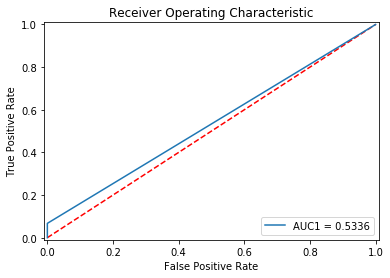

In [17]:
#Métrica
f = plt.figure()
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(List_fpr[0], List_tpr[0], 'tab:blue', label = 'AUC1 = %0.4f' % List_roc_auc[0])
'''
plt.plot(List_fpr[1], List_tpr[1], 'tab:orange', label = 'AUC2 = %0.4f' % List_roc_auc[1])
plt.plot(List_fpr[2], List_tpr[2], 'tab:green', label = 'AUC3 = %0.4f' % List_roc_auc[2])
plt.plot(List_fpr[3], List_tpr[3], 'tab:red', label = 'AUC4 = %0.4f' % List_roc_auc[3])
plt.plot(List_fpr[4], List_tpr[4], 'tab:purple', label = 'AUC5 = %0.4f' % List_roc_auc[4])
plt.plot(List_fpr[5], List_tpr[5], 'tab:brown', label = 'AUC6 = %0.4f' % List_roc_auc[5])
'''
plt.legend(loc = 'lower right')
plt.show()
f.savefig('mx_roc3.pdf', bbox_inches='tight')

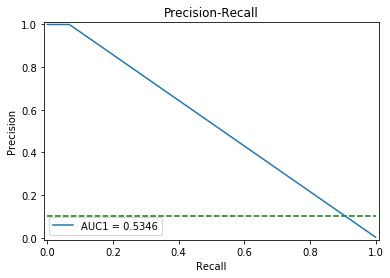

In [16]:
#Métrica
f = plt.figure()
plt.title('Precision-Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot([0, 1], [0.1, 0.1],'g--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(List_recall[0], List_precision[0], 'tab:blue', label = 'AUC1 = %0.4f' % List_pr_auc[0])
'''
plt.plot(List_recall[1], List_precision[1], 'tab:orange', label = 'AUC2 = %0.4f' % List_pr_auc[1])
plt.plot(List_recall[2], List_precision[2], 'tab:green', label = 'AUC3 = %0.4f' % List_pr_auc[2])
plt.plot(List_recall[3], List_precision[3], 'tab:red', label = 'AUC4 = %0.4f' % List_pr_auc[3])
plt.plot(List_recall[4], List_precision[4], 'tab:purple', label = 'AUC5 = %0.4f' % List_pr_auc[4])
plt.plot(List_recall[5], List_precision[5], 'tab:brown', label = 'AUC6 = %0.4f' % List_pr_auc[5])
'''
plt.legend(loc = 'lower left')
plt.show()
f.savefig('mx_pr3.pdf', bbox_inches='tight')

In [ ]:
#Métrica
#1. ROC curve
for i in range(6):
    f=plt.figure
    plot_roc_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    plt.show()

In [ ]:
#Métrica
#2. PR curve
for i in range(6):
    f=plt.figure
    precision, recall, thresholds = plot_pr_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    plt.show()
    # calculate precision-recall AUC
    auc1 = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    print('Tarea %d auc=%.3f ap=%.3f' % (i+1,auc1, ap))

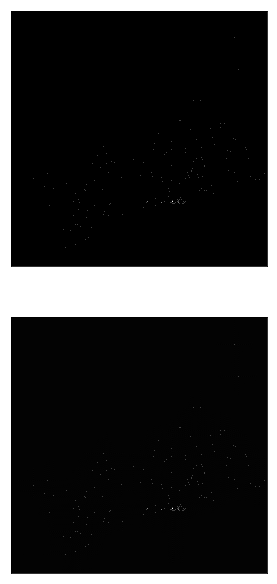

In [19]:
n = 1
plt.figure(figsize=(16, 16))
for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(Y1_test[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_grids_1[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

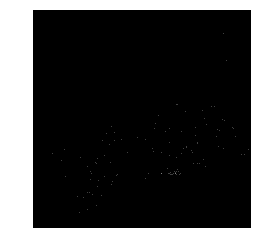

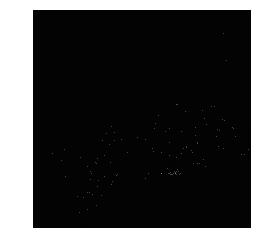

In [20]:
i = 50
f = plt.figure()
plt.imshow(Y1_test[i].reshape(256, 256))
plt.axis('off')
f.savefig("t1i13.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_1[i].reshape(256, 256))
plt.axis('off')
f.savefig("t1i23.pdf", bbox_inches='tight')

In [ ]:
i = 50
f = plt.figure()
plt.imshow(Y2_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t2i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_2[i].reshape(128, 128))
plt.axis('off')
f.savefig("t2i2.pdf", bbox_inches='tight')

In [ ]:
i = 50
f = plt.figure()
plt.imshow(Y3_test_h[i].reshape(128, 128))
plt.axis('off')
f.savefig("t3i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_3[i].reshape(128, 128))
plt.axis('off')
f.savefig("t3i2.pdf", bbox_inches='tight')

In [ ]:
i = 50
f = plt.figure()
plt.imshow(Y4_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t4i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_4[i].reshape(128, 128))
plt.axis('off')
f.savefig("t4i2.pdf", bbox_inches='tight')

In [ ]:
i = 50
f = plt.figure()
plt.imshow(Y5_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t5i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_5[i].reshape(128, 128))
plt.axis('off')
f.savefig("t5i2.pdf", bbox_inches='tight')

In [ ]:
i = 50
f = plt.figure()
plt.imshow(Y6_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t6i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_6[i].reshape(128, 128))
plt.axis('off')
f.savefig("t6i2.pdf", bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


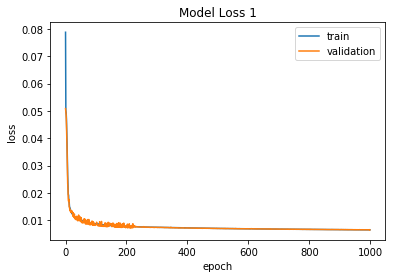

In [21]:
print(history_1.history.keys())
f = plt.figure()
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m1a.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


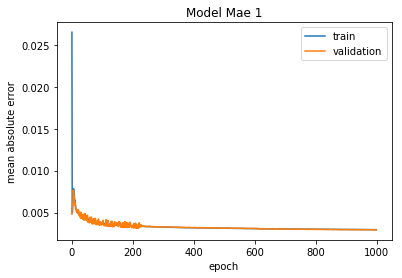

In [22]:
print(history_1.history.keys())
f = plt.figure()
plt.plot(history_1.history['mean_absolute_error'])
plt.plot(history_1.history['val_mean_absolute_error'])
plt.title('Model Mae 1')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m1b.pdf', bbox_inches='tight')

In [ ]:
print(history_2.history.keys())
f = plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m2a.pdf', bbox_inches='tight')

In [ ]:
print(history_2.history.keys())
f = plt.figure()
plt.plot(history_2.history['mean_absolute_error'])
plt.plot(history_2.history['val_mean_absolute_error'])
plt.title('Model Mae 2')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m2b.pdf', bbox_inches='tight')

In [ ]:
print(history_3_h_6x6.history.keys())
f = plt.figure()
plt.plot(history_3_h_6x6.history['loss'])
plt.plot(history_3_h_6x6.history['val_loss'])
plt.title('Model Loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m3a.pdf', bbox_inches='tight')

In [ ]:
print(history_3_h_6x6.history.keys())
f = plt.figure()
plt.plot(history_3_h_6x6.history['mean_absolute_error'])
plt.plot(history_3_h_6x6.history['val_mean_absolute_error'])
plt.title('Model Mae 3')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m3b.pdf', bbox_inches='tight')

In [ ]:
print(history_4.history.keys())
f = plt.figure()
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss 4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m4a.pdf', bbox_inches='tight')

In [ ]:
print(history_4.history.keys())
f = plt.figure()
plt.plot(history_4.history['mean_absolute_error'])
plt.plot(history_4.history['val_mean_absolute_error'])
plt.title('Model Mae 4')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m4b.pdf', bbox_inches='tight')

In [ ]:
print(history_5.history.keys())
f = plt.figure()
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model Loss 5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m5a.pdf', bbox_inches='tight')

In [ ]:
print(history_5.history.keys())
f = plt.figure()
plt.plot(history_5.history['mean_absolute_error'])
plt.plot(history_5.history['val_mean_absolute_error'])
plt.title('Model Mae 5')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m5b.pdf', bbox_inches='tight')

In [ ]:
print(history_6.history.keys())
f = plt.figure()
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model Loss 6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m6a.pdf', bbox_inches='tight')

In [ ]:
print(history_6.history.keys())
f = plt.figure()
plt.plot(history_6.history['mean_absolute_error'])
plt.plot(history_6.history['val_mean_absolute_error'])
plt.title('Model Mae 6')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m6b.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['loss'], linewidth=1)
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.plot(history_2.history['loss'], linewidth=1)
plt.plot(history_2.history['val_loss'], linewidth=1)
plt.plot(history_3_h_6x6.history['loss'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_loss'], linewidth=1)
plt.plot(history_4.history['loss'], linewidth=1)
plt.plot(history_4.history['val_loss'], linewidth=1)
plt.plot(history_5.history['loss'], linewidth=1)
plt.plot(history_5.history['val_loss'], linewidth=1)
plt.plot(history_6.history['loss'], linewidth=1)
plt.plot(history_6.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_loss.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.plot(history_2.history['val_loss'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_loss'], linewidth=1)
plt.plot(history_4.history['val_loss'], linewidth=1)
plt.plot(history_5.history['val_loss'], linewidth=1)
plt.plot(history_6.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_loss.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['mean_absolute_error'], linewidth=1)
plt.plot(history_1.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_2.history['mean_absolute_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['mean_absolute_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_4.history['mean_absolute_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_5.history['mean_absolute_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_6.history['mean_absolute_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_error'], linewidth=1)
plt.title('Models Mae')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_mae.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_error'], linewidth=1)
plt.title('Models Mae')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_mae.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['coeff_determination'], linewidth=1)
plt.plot(history_1.history['val_coeff_determination'], linewidth=1)
plt.plot(history_2.history['coeff_determination'], linewidth=1)
plt.plot(history_2.history['val_coeff_determination'], linewidth=1)
plt.plot(history_3_h_6x6.history['coeff_determination'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_coeff_determination'], linewidth=1)
plt.plot(history_4.history['coeff_determination'], linewidth=1)
plt.plot(history_4.history['val_coeff_determination'], linewidth=1)
plt.plot(history_5.history['coeff_determination'], linewidth=1)
plt.plot(history_5.history['val_coeff_determination'], linewidth=1)
plt.plot(history_6.history['coeff_determination'], linewidth=1)
plt.plot(history_6.history['val_coeff_determination'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('coeff determination')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_r2.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['val_coeff_determination'], linewidth=1)
plt.plot(history_2.history['val_coeff_determination'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_coeff_determination'], linewidth=1)
plt.plot(history_4.history['val_coeff_determination'], linewidth=1)
plt.plot(history_5.history['val_coeff_determination'], linewidth=1)
plt.plot(history_6.history['val_coeff_determination'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('coeff determination')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_r2.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_1.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_2.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_4.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_5.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_6.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_MAPE.pdf', bbox_inches='tight')

In [ ]:
f = plt.figure()
plt.plot(history_1.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_MAPE.pdf', bbox_inches='tight')

<h5><center>INICIO DE PRUEBAS</center></h5>

In [ ]:
#Métrica
import pickle
pickle_in = open("decoded_grids_1.pickle","rb")
decoded_grids_1 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_2.pickle","rb")
decoded_grids_2 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_3.pickle","rb")
decoded_grids_3 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_4.pickle","rb")
decoded_grids_4 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_5.pickle","rb")
decoded_grids_5 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_6.pickle","rb")
decoded_grids_6 = pickle.load(pickle_in)

In [23]:
#PROBANDO guardar variables con pickle
import pickle
pickle_out = open("history_13.pickle","wb")
pickle.dump(history_1,pickle_out)
pickle_out.close()
'''
pickle_out = open("history_23.pickle","wb")
pickle.dump(history_2,pickle_out)
pickle_out.close()
pickle_out = open("history_3_h_6x63.pickle","wb")
pickle.dump(history_3_h_6x6,pickle_out)
pickle_out.close()
pickle_out = open("history_43.pickle","wb")
pickle.dump(history_4,pickle_out)
pickle_out.close()
pickle_out = open("history_53.pickle","wb")
pickle.dump(history_5,pickle_out)
pickle_out.close()
pickle_out = open("history_63.pickle","wb")
pickle.dump(history_6,pickle_out)
pickle_out.close()
'''

'\npickle_out = open("history_23.pickle","wb")\npickle.dump(history_2,pickle_out)\npickle_out.close()\npickle_out = open("history_3_h_6x63.pickle","wb")\npickle.dump(history_3_h_6x6,pickle_out)\npickle_out.close()\npickle_out = open("history_43.pickle","wb")\npickle.dump(history_4,pickle_out)\npickle_out.close()\npickle_out = open("history_53.pickle","wb")\npickle.dump(history_5,pickle_out)\npickle_out.close()\npickle_out = open("history_63.pickle","wb")\npickle.dump(history_6,pickle_out)\npickle_out.close()\n'

In [24]:
#PROBANDO guardar los modelos
autoencoder1.save("autoencoder13.h5")
'''
autoencoder2.save("autoencoder23.h5")
autoencoder3_h_6x6.save("autoencoder3_h_6x63.h5")
autoencoder4.save("autoencoder43.h5")
autoencoder5.save("autoencoder53.h5")
autoencoder6.save("autoencoder63.h5")
'''

'\nautoencoder2.save("autoencoder23.h5")\nautoencoder3_h_6x6.save("autoencoder3_h_6x63.h5")\nautoencoder4.save("autoencoder43.h5")\nautoencoder5.save("autoencoder53.h5")\nautoencoder6.save("autoencoder63.h5")\n'

In [ ]:
#PROBANDO código para guardar imagen del modelo con capas
from keras.utils.vis_utils import plot_model
plot_model(autoencoder1, to_file='autoencoder1.pdf',show_shapes=True, show_layer_names=True)

In [ ]:
#PROBANDO código para cargar un modelo guardado en h5
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
from keras.models import load_model
model = load_model('Modelos/3x6/AE3days3x6_3000epochs.h5',custom_objects={'root_mean_squared_error': root_mean_squared_error, 'coeff_determination':coeff_determination})

<h5><center>FIN DE PRUEBAS</center></h5>